In [4]:
import pandas as pd
df = pd.read_csv('data/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Number of updates')

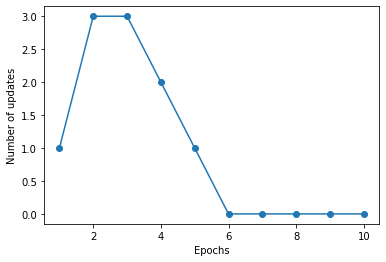

In [6]:
from perceptron import Perceptron

pnn = Perceptron(eta=0.1, n_iter=10)
pnn.fit(X, y)
plt.plot(range(1, len(pnn.errors_) + 1), pnn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

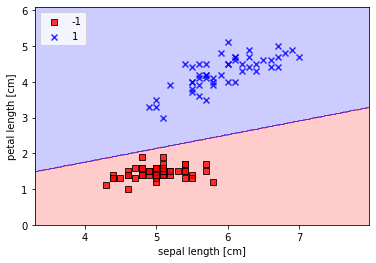

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1], 
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

plot_decision_regions(X, y, classifier=pnn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

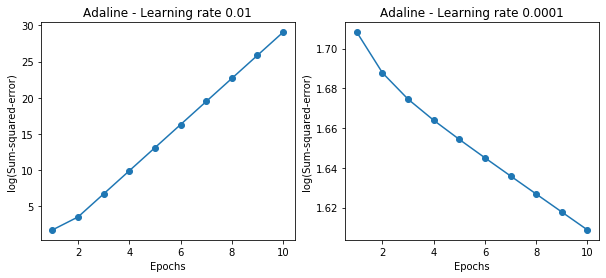

In [8]:
from adaline_gd import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

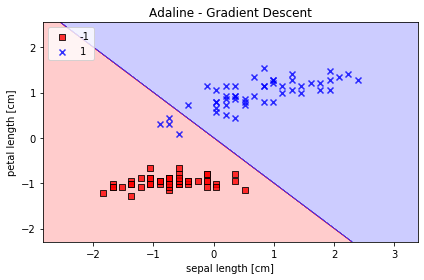

In [9]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

Text(0, 0.5, 'Sum-squared-error')

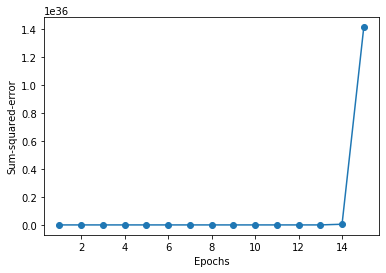

In [10]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

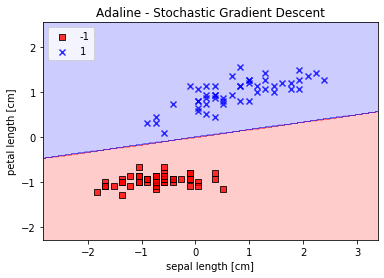

In [11]:
from adaline_sgd import AdalineSGD

ada = AdalineSGD(n_iter=15, eta=0.1, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Average Cost')

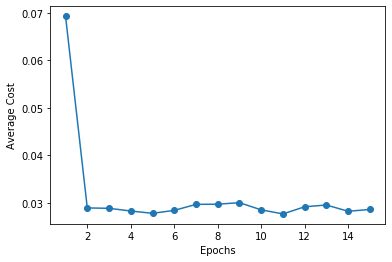

In [12]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

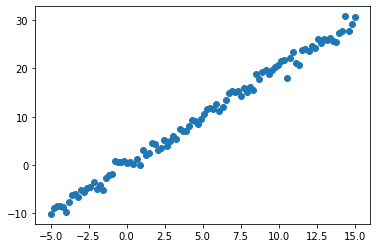

In [13]:
data_linear = np.load('data/linear.npy')
plt.scatter(data_linear[:,0], data_linear[:,1])

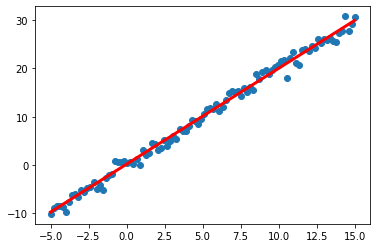

In [20]:
from adaline_gd_regression import AdalineGDRegression

reglin = AdalineGDRegression(n_iter=150, eta=0.00001, random_state=1)
reglin.fit(data_linear[:,0][:,np.newaxis], data_linear[:,1])

plt.scatter(data_linear[:,0], data_linear[:,1])
plt.plot(data_linear[:,0],reglin.predict(data_linear[:,0][:,np.newaxis]), color='red', linewidth=3)

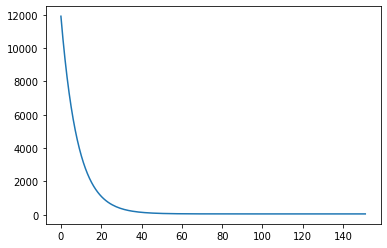

In [15]:
plt.plot(np.linspace(0, len(reglin.cost_) + 1, len(reglin.cost_)), reglin.cost_)

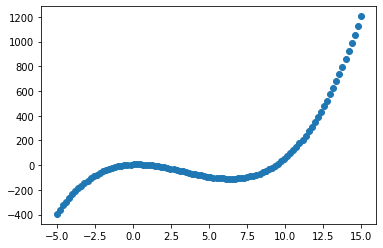

In [16]:
data_nonlinear = np.load('data/nonlinear.npy')
plt.scatter(data_nonlinear[:,0], data_nonlinear[:,1])

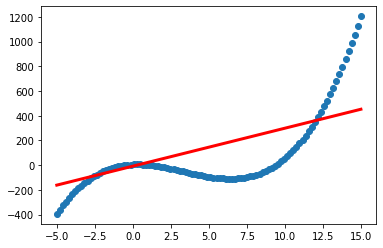

In [19]:
from adaline_gd_nonlinear_regression import AdalineGDNonlinearRegression

regnonlin = AdalineGDNonlinearRegression(n_iter=150, eta=0.00001, random_state=1)
reglin.fit(data_nonlinear[:,0][:,np.newaxis], data_nonlinear[:,1])

plt.scatter(data_nonlinear[:,0], data_nonlinear[:,1])
plt.plot(data_nonlinear[:,0],reglin.predict(data_nonlinear[:,0][:,np.newaxis]), color='red', linewidth=3)